In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("house price.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.drop(columns='stories',inplace=True)

In [16]:
#feature encoding 
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()


In [17]:
df['mainroad']=le1.fit_transform(df['mainroad'])
df['guestroom']=le2.fit_transform(df['guestroom'])
df['basement']=le3.fit_transform(df['basement'])
df['hotwaterheating']=le4.fit_transform(df['hotwaterheating'])
df['airconditioning']=le5.fit_transform(df['airconditioning'])
df['prefarea']=le6.fit_transform(df['prefarea'])
df['furnishingstatus']=le7.fit_transform(df['furnishingstatus'])

In [18]:
x=df[['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus']]
y=df['price']

In [35]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
import pickle 
pickle.dump(scaler,open('standard.pkl','wb'))

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))


0.6086772003255208


In [14]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.6 MB/s eta 0:00:36
    --------------------------------------- 0.8/56.8 MB 1.3 MB/s eta 0:00:44
    --------------------------------------- 1.0/56.8 MB 1.5 MB/s eta 0:00:38
   - -------------------------------------- 1.6/56.8 MB 1.6 MB/s eta 0:00:35
   - -------------------------------------- 1.8/56.8 MB 1.5 MB/s eta 0:00:37
   - -------------------------------------- 2.1/56.8 MB 1.6 MB/s eta 0:00:35
   - -------------------------------------- 2.6/56.8 MB 1.6 MB/s eta 0:00:33
   -- ------------------------------------- 2.9/56.8 MB 1.6 MB/s eta 0:00:35
   -- ------------------------------------- 3.1/56.8 MB 1.6 MB/s eta 0:00:34
   -- ------------------------------------- 3.7/56.8 MB 1.7 MB/s eta 0:00:32
   -- ------------------------------------- 4.2/56.8 MB 1.7 MB/s eta 0:00:31
   --- ------

In [15]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))


0.5496459007263184


In [22]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)
y_ran=random.predict(x_test)

In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_ran)
print("R² Score (Accuracy):", r2)


R² Score (Accuracy): 0.576925404174091


In [24]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
y_p=ridge.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_p))

0.6199377994746617


In [26]:
from sklearn.linear_model import LassoCV
lasso=LassoCV(cv=5)
lasso.fit(x_train,y_train)
y_p=lasso.predict(x_test)

In [27]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_p))

0.6198823918167733


In [16]:
from sklearn.naive_bayes import BernoulliNB
gaus=BernoulliNB()
gaus.fit(x_train,y_train)
y_pred=gaus.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.03333333333333333
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         2
     1767150       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2275000       0.00      0.00      0.00         2
     2380000       0.00      0.00      0.00         1
     2408000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         3
     2520000       0.00      0.00      0.00         2
     2653000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         5
     2800000       0.00      0.00      0.00         1
     2835000       0.00      0.00      0.00      

f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricW

In [20]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
param_grid={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)

In [21]:
grid.fit(x_train,y_train)
y_pred=grid.predict(x_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


f:\anacoda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.027 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.027 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.041 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.041 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.041 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.027 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.027 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.041 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.041 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.041 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.027 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.027 total time=   0.1s
[CV 3/5] END .....C=0.1, gam

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.03333333333333333
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         2
     1767150       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2240000       0.00      0.00      0.00         0
     2275000       0.00      0.00      0.00         2
     2380000       0.00      0.00      0.00         1
     2408000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         3
     2520000       0.00      0.00      0.00         2
     2653000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         5
     2800000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     2940000       0.08      0.33      0.12         3
     30

f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricW

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)


In [37]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)

In [38]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.6199841938395299


In [39]:
import pickle
pickle.dump(linear,open('linear.pkl','wb'))

In [32]:
model=pickle.load(open('linear.pkl','rb'))

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
m=np.sqrt(mean_squared_error(y_test,y_pred))

1628640659763.0715
953867.7531341815


In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(algorithm='kd_tree',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [15]:
y_ped=classifier.predict(x_test)

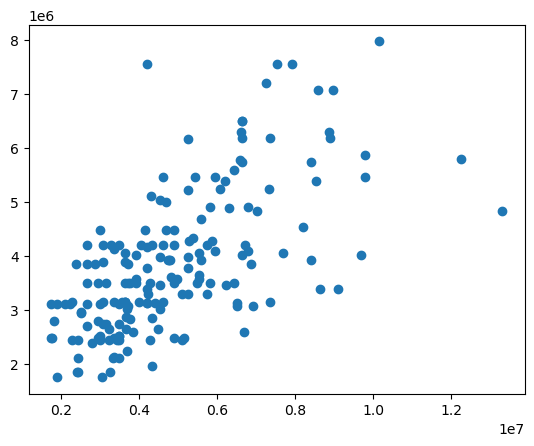

In [ ]:
plt.scatter(y_test,y_ped)

plt.show()

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_ped))
print(classification_report(y_test,y_ped))
print(confusion_matrix(y_test,y_ped))

0.005555555555555556
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         2
     1767150       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1855000       0.00      0.00      0.00         0
     1890000       0.00      0.00      0.00         2
     1960000       0.00      0.00      0.00         0
     2100000       0.00      0.00      0.00         1
     2135000       0.00      0.00      0.00         0
     2233000       0.00      0.00      0.00         1
     2240000       0.00      0.00      0.00         0
     2275000       0.00      0.00      0.00         2
     2380000       0.00      0.00      0.00         1
     2408000       0.00      0.00      0.00         1
     2450000       0.12      0.33      0.18         3
     2485000       0.00      0.00      0.00         0
     2520000       0.00      0.00      0.00         2
     2590000       0.00      0.00      0.00         0
     2

f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricW

In [10]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)


LogisticRegression()

In [12]:
y_ped=logistic.predict(x_test)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   mainroad          545 non-null    int64
 5   guestroom         545 non-null    int64
 6   basement          545 non-null    int64
 7   hotwaterheating   545 non-null    int64
 8   airconditioning   545 non-null    int64
 9   parking           545 non-null    int64
 10  prefarea          545 non-null    int64
 11  furnishingstatus  545 non-null    int64
dtypes: int64(12)
memory usage: 51.2 KB


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_ped))
print(classification_report(y_test,y_ped))
print(confusion_matrix(y_test,y_ped))

0.022222222222222223
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         2
     1767150       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     1960000       0.00      0.00      0.00         0
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2275000       0.00      0.00      0.00         2
     2380000       0.00      0.00      0.00         1
     2408000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         3
     2520000       0.00      0.00      0.00         2
     2653000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         5
     2800000       0.00      0.00      0.00         1
     2835000       0.00      0.00      0.00         0
     2870000       0.00      0.00      0.00         1
     2

f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricW